In [1]:
import pandas as pd

# Cargar el archivo Excel
file_path = "TAGUATO_19_03_2025-13_07_18_completo.xlsx"  # Reemplaza con la ubicaci√≥n de tu archivo
df = pd.read_excel(file_path)

# Ver las primeras filas
df.head()

df = df.drop(columns=["DATE/TIME(America/Asuncion)"])

In [3]:
df.columns

Index(['Carga Diario', 'Caudal√≠metros Total', 'Ecosonda', 'Flow Rate Diario',
       'Flow Rate Gen. BR', 'Flow Rate Gen. STB', 'Flow Rate Prop. BR',
       'Flow Rate Prop. STB', 'Latitud', 'Longitud', 'Presion Aceite Prop. BR',
       'Presion Aceite Prop. STB', 'Presion Caja Prop. BR',
       'Presion Caja Prop. STB', 'Prop. BR Temp. Cil. 1',
       'Prop. BR Temp. Cil. 10', 'Prop. BR Temp. Cil. 11',
       'Prop. BR Temp. Cil. 12', 'Prop. BR Temp. Cil. 2',
       'Prop. BR Temp. Cil. 3', 'Prop. BR Temp. Cil. 4',
       'Prop. BR Temp. Cil. 5', 'Prop. BR Temp. Cil. 6',
       'Prop. BR Temp. Cil. 7', 'Prop. BR Temp. Cil. 8',
       'Prop. BR Temp. Cil. 9', 'Prop. STB Temp. Cil. 1',
       'Prop. STB Temp. Cil. 10', 'Prop. STB Temp. Cil. 11',
       'Prop. STB Temp. Cil. 12', 'Prop. STB Temp. Cil. 2',
       'Prop. STB Temp. Cil. 3', 'Prop. STB Temp. Cil. 4',
       'Prop. STB Temp. Cil. 5', 'Prop. STB Temp. Cil. 6',
       'Prop. STB Temp. Cil. 7', 'Prop. STB Temp. Cil. 8',
       

In [ ]:
# df.to_csv('taguato_chgpt.csv', index=False)

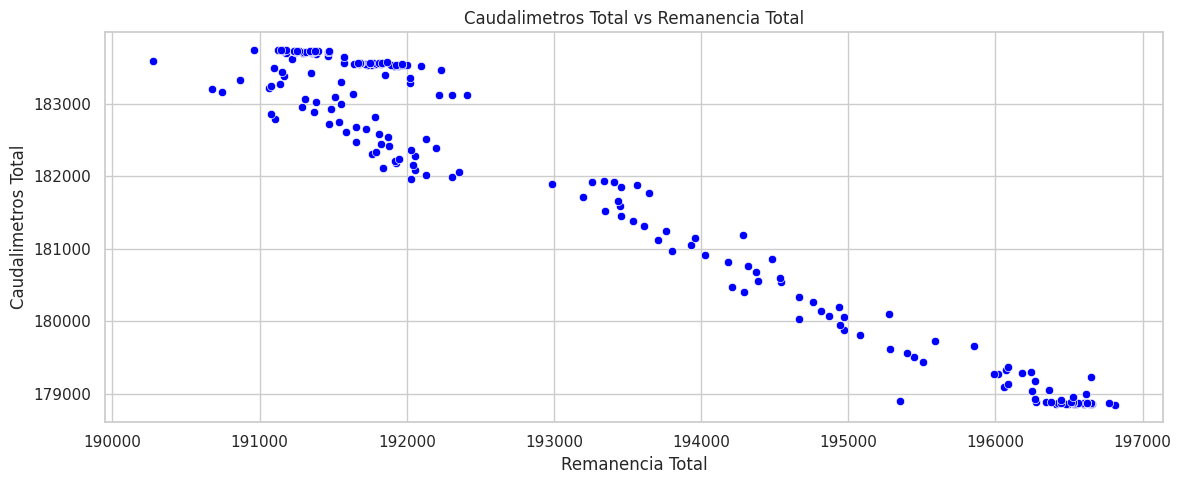

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n del estilo de los gr√°ficos
sns.set(style="whitegrid")

# Crear gr√°ficos de dispersi√≥n para cada h√©lice
fig, axes = plt.subplots(figsize=(12, 5))

# Gr√°fico para la h√©lice de babor (BR)
sns.scatterplot(x=df["Remanencia Total"], y=df["Caudal√≠metros Total"], ax=axes, color="blue")
axes.set_title("Caudalimetros Total vs Remanencia Total")
axes.set_xlabel("Remanencia Total")
axes.set_ylabel("Caudalimetros Total")

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# üîπ Eliminar NaN
# df = df.dropna()
df = df.fillna(df.median())

# üîπ Separar variables de entrada (X) y salida (y)

X = df.drop("Caudal√≠metros Total",axis=1)
y = df["Caudal√≠metros Total"]

# üîπ Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# üîπ Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# üîπ Definir la arquitectura de la red neuronal
def crear_modelo():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="linear")  # Salida lineal
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# üîπ Entrenar el modelo para BR
model = crear_modelo()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# üîπ Hacer predicciones
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [15]:
# üîπ Evaluar los modelos
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# üîπ Mostrar los resultados
print(f"üîπ Red Neuronal - Caudalimetros Total-> MSE: {mse:.4f}, R¬≤: {r2:.4f}")

üîπ Red Neuronal - Caudalimetros Total-> MSE: 480699769.0346, R¬≤: -1391.1372


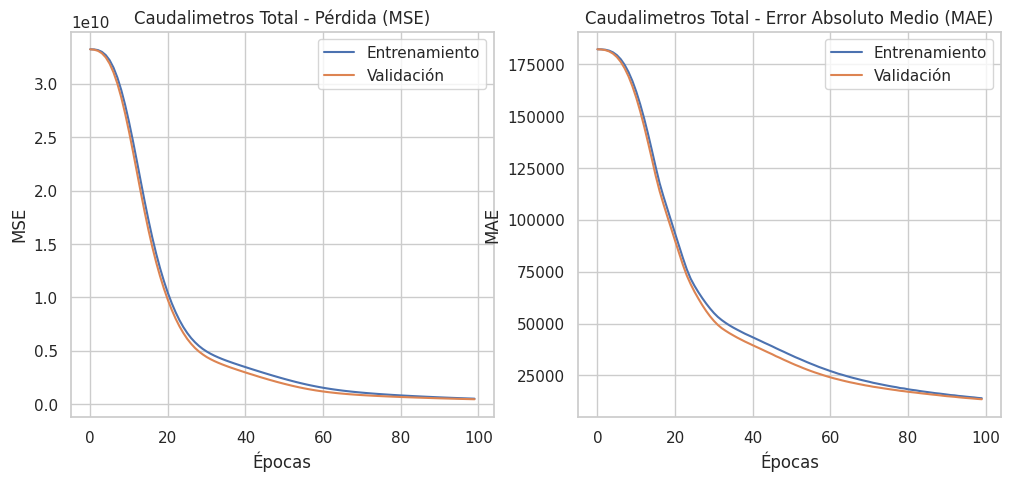

In [12]:
import matplotlib.pyplot as plt

# üîπ Funci√≥n para graficar la evoluci√≥n del entrenamiento
def plot_history(history, title="Historial de Entrenamiento"):
    plt.figure(figsize=(12, 5))

    # üîπ Gr√°fico de p√©rdida (MSE)
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Entrenamiento")
    plt.plot(history.history["val_loss"], label="Validaci√≥n")
    plt.xlabel("√âpocas")
    plt.ylabel("MSE")
    plt.title(f"{title} - P√©rdida (MSE)")
    plt.legend()

    # üîπ Gr√°fico de MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Entrenamiento")
    plt.plot(history.history["val_mae"], label="Validaci√≥n")
    plt.xlabel("√âpocas")
    plt.ylabel("MAE")
    plt.title(f"{title} - Error Absoluto Medio (MAE)")
    plt.legend()

    plt.show()

# üîπ Mostrar gr√°ficos
plot_history(history, title="Caudalimetros Total")

"""
¬øQu√© est√°s viendo?
Loss (MSE): Si disminuye de forma constante tanto en entrenamiento como en validaci√≥n, el modelo est√° aprendiendo bien.

MAE: Muestra el promedio del error absoluto. Tambi√©n debe disminuir.

Si la curva de validaci√≥n comienza a aumentar mientras la de entrenamiento baja, est√°s frente a un sobreajuste.
"""

In [31]:
len(X_test),len(y_test)

(507, 507)

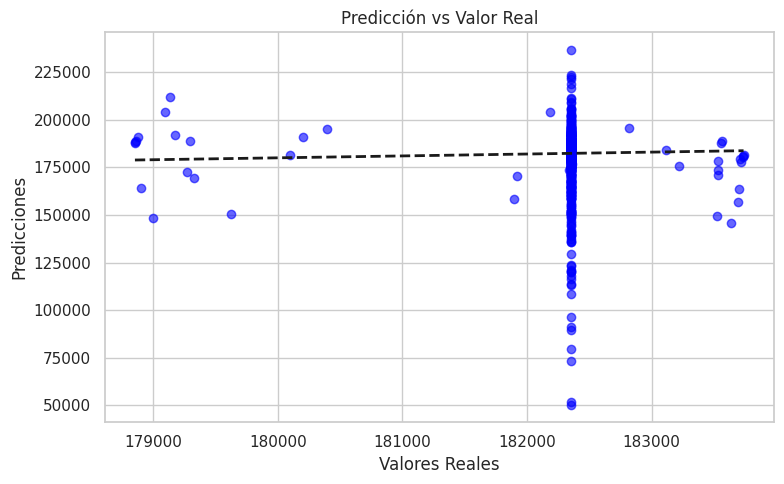

In [32]:
# üîπ Visualizaci√≥n de resultados: y_test vs y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)  # L√≠nea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicci√≥n vs Valor Real")
plt.grid(True)
plt.tight_layout()
plt.show()
